In [2]:
import sqlite3

# SQL

## Exploration

Let's use DBeaver, a universal database client for developers, SQL programmers, database administrators and analysts.

https://dbeaver.io/

## ERD Diagram

When discovering a new database, a data scientist should explore and draw the Entity Relationship Diagram.

https://www.visual-paradigm.com/guide/data-modeling/what-is-entity-relationship-diagram/

👉 Useful tool: kitt.lewagon.com/db (Save XML)

https://kitt.lewagon.com/db

https://online.visual-paradigm.com/diagrams/solutions/free-erd-tool/

https://gitmind.com/er-diagram-tool.html

## SQLite

A database stored in a single file.

👉 https://www.sqlite.org/index.html


For the examples below, we use the 👉 European Soccer Database on Kaggle

https://www.kaggle.com/hugomathien/soccer/

### Connecting To The Database

#### Reaching for the sqlite3 package.

In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

In [3]:
c.execute("SELECT * FROM Country")
rows = c.fetchall()
rows

[(1, 'Belgium'),
 (1729, 'England'),
 (4769, 'France'),
 (7809, 'Germany'),
 (10257, 'Italy'),
 (13274, 'Netherlands'),
 (15722, 'Poland'),
 (17642, 'Portugal'),
 (19694, 'Scotland'),
 (21518, 'Spain'),
 (24558, 'Switzerland')]

#### You can also fetch a list of sqlite3.Row elements:

https://docs.python.org/3/library/sqlite3.html#sqlite3.Row

In [4]:
conn = sqlite3.connect('data/soccer.sqlite')
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [5]:
c.execute("SELECT * FROM Country")
rows = c.fetchall()
first_row = rows[0]

In [6]:
first_row['name']

'Belgium'

In [7]:
tuple(first_row)

(1, 'Belgium')

#### Fetching only one element

Sometimes you know that your query will yield only one (or zero!) element. Then use fetchone:

https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchone

In [8]:
c.execute("SELECT * FROM Country WHERE Country.id = 1")
row = c.fetchone()
print(row[0], '-' ,row[1])

1 - Belgium


In [9]:
c.execute("SELECT * FROM Country WHERE Country.id = 2")
row = c.fetchone()
print(row)

None


### SQL Basics

In [10]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

#### Projection

Choosing which columns the query shall return.

🤔 Retrieve id, season, stage and date of all matches

In [11]:
query = '''
    SELECT "Match".id, "Match".season, "Match".stage, "Match".date 
    FROM "Match"
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]


Rows Returned: 25979


[(1, '2008/2009', 1, '2008-08-17 00:00:00'),
 (2, '2008/2009', 1, '2008-08-16 00:00:00'),
 (3, '2008/2009', 1, '2008-08-16 00:00:00'),
 (4, '2008/2009', 1, '2008-08-17 00:00:00'),
 (5, '2008/2009', 1, '2008-08-16 00:00:00'),
 (6, '2008/2009', 1, '2008-09-24 00:00:00'),
 (7, '2008/2009', 1, '2008-08-16 00:00:00'),
 (8, '2008/2009', 1, '2008-08-16 00:00:00'),
 (9, '2008/2009', 1, '2008-08-16 00:00:00'),
 (10, '2008/2009', 10, '2008-11-01 00:00:00')]

💡Tip: You can alias tables name for enhanced readability

In [12]:
query = '''
    SELECT matches.id, matches.season, matches.stage, matches.date
    FROM "Match" AS matches
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 25979


[(1, '2008/2009', 1, '2008-08-17 00:00:00'),
 (2, '2008/2009', 1, '2008-08-16 00:00:00'),
 (3, '2008/2009', 1, '2008-08-16 00:00:00'),
 (4, '2008/2009', 1, '2008-08-17 00:00:00'),
 (5, '2008/2009', 1, '2008-08-16 00:00:00'),
 (6, '2008/2009', 1, '2008-09-24 00:00:00'),
 (7, '2008/2009', 1, '2008-08-16 00:00:00'),
 (8, '2008/2009', 1, '2008-08-16 00:00:00'),
 (9, '2008/2009', 1, '2008-08-16 00:00:00'),
 (10, '2008/2009', 10, '2008-11-01 00:00:00')]

Other usefull SELECT lines:

Return time delta between two columns:

```sql
    SELECT
        *,
        julianday(orders.ShippedDate) - julianday(orders.OrderDate) AS TimeDelta
```

#### Selection

Selecting which rows the query shall return.

🤔 Retrieve matches which happened in France

In [13]:
query = '''
    SELECT matches.id, matches.season, matches.stage, matches.date, matches.country_id
    FROM "Match" AS matches
    WHERE matches.country_id = 4769
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 3040


[(4769, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4770, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4771, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4772, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4773, '2008/2009', 1, '2008-08-10 00:00:00', 4769),
 (4774, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4775, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4776, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4777, '2008/2009', 1, '2008-08-09 00:00:00', 4769),
 (4778, '2008/2009', 1, '2008-08-09 00:00:00', 4769)]

---

🤔 Retrieve matches which happened in Belgium or England

In [14]:
query = '''
    SELECT matches.id, matches.season, matches.stage, matches.date, matches.country_id
    FROM "Match" AS matches
    WHERE matches.country_id = 1
    OR matches.country_id = 1729
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 4768


[(1, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (2, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (3, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (4, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (5, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (6, '2008/2009', 1, '2008-09-24 00:00:00', 1),
 (7, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (8, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (9, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (10, '2008/2009', 10, '2008-11-01 00:00:00', 1)]

---

Alternative:

**Note: the WHERE ... IN ... list needs to be passed as a tuple!!**

In [15]:
country_ids = (1,1729)

query = f'''
    SELECT matches.id, matches.season, matches.stage, matches.date, matches.country_id
    FROM "Match" AS matches
    WHERE matches.country_id IN {country_ids}
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 4768


[(1, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (2, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (3, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (4, '2008/2009', 1, '2008-08-17 00:00:00', 1),
 (5, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (6, '2008/2009', 1, '2008-09-24 00:00:00', 1),
 (7, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (8, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (9, '2008/2009', 1, '2008-08-16 00:00:00', 1),
 (10, '2008/2009', 10, '2008-11-01 00:00:00', 1)]

- - -

🤔 Retrieve players named John

In [16]:
query = '''
    SELECT *
    FROM Player
    WHERE UPPER(Player.player_name) LIKE "JOHN %"
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0]

Rows Returned: 31


(5093,
 278831,
 'John Anthony Brooks',
 204082,
 '1993-01-28 00:00:00',
 193.04,
 172)

Other usefull WHERE lines:

Return where minutes are not null
```sql
WHERE minutes IS NOT NULL
```

Return OrderDate between two values

```sql
WHERE OrderDate > ?
AND OrderDate <= ?
```


#### Counting

Counting the number of rows matching the selection

🤔 How many players are taller than 2.00 meters?

In [17]:
query = '''
    SELECT COUNT(Player.id)
    FROM Player
    WHERE Player.height >= 200
'''

c.execute(query)
rows = c.fetchone()

print(f'Rows Returned: {len(rows)}')

rows[0]

Rows Returned: 1


22

#### Sorting

Sorting the rows based on a column (or a group of columns)

🤔 Who are the 10 heaviest players?

In [18]:
query = '''
    SELECT *
    FROM Player
    ORDER BY Player.weight DESC
    LIMIT 10
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows[0:10]

Rows Returned: 10


[(5908,
  148325,
  'Kristof van Hout',
  185306,
  '1987-02-09 00:00:00',
  208.28,
  243),
 (10313, 27313, 'Tim Wiese', 53012, '1981-12-17 00:00:00', 193.04, 243),
 (4884, 5044, 'Jeroen Verhoeven', 137692, '1980-04-30 00:00:00', 198.12, 227),
 (4412, 27267, 'Ishmael Miller', 169725, '1987-03-05 00:00:00', 193.04, 225),
 (1598, 101584, 'Cassio', 167958, '1987-06-06 00:00:00', 195.58, 220),
 (1822, 19020, 'Christopher Samba', 46590, '1984-03-28 00:00:00', 193.04, 220),
 (5976, 210822, 'Lars Unnerstall', 199833, '1990-07-20 00:00:00', 198.12, 220),
 (6772, 30669, 'Marcus Hahnemann', 53785, '1972-06-15 00:00:00', 190.5, 220),
 (45, 40005, 'Abdoulaye Faye', 100329, '1978-02-26 00:00:00', 187.96, 218),
 (3030, 33060, 'Enoch Showunmi', 157589, '1982-04-21 00:00:00', 195.58, 218)]

You can order by multiple criteria. The ordering is done in the order specified.

The query below will first order the first_name  by length and then alphabetically.

```sql
SELECT first_name
FROM patients
ORDER BY
  len(first_name),
  first_name;
```

#### Grouping

YOU CAN GROUP BY MULTIPLE FIELDS, AND THE FIELDS DON'T NEED TO BE IN THE SELECTION

Grouping rows on a given column C (aggregating rows with a function where values of C column are the same)

🤔 How many matches were played on a per-country basis?

In [19]:
query = '''
    SELECT COUNT(matches.id), matches.country_id
    FROM "Match" AS matches
    GROUP BY matches.country_id
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[(1728, 1),
 (3040, 1729),
 (3040, 4769),
 (2448, 7809),
 (3017, 10257),
 (2448, 13274),
 (1920, 15722),
 (2052, 17642),
 (1824, 19694),
 (3040, 21518),
 (1422, 24558)]

---

🤔 What if we want to sort those results? We need an alias:

In [20]:
query = '''
    SELECT COUNT(matches.id) AS match_count, matches.country_id
    FROM "Match" AS matches
    GROUP BY matches.country_id
    ORDER BY match_count DESC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[(3040, 21518),
 (3040, 4769),
 (3040, 1729),
 (3017, 10257),
 (2448, 13274),
 (2448, 7809),
 (2052, 17642),
 (1920, 15722),
 (1824, 19694),
 (1728, 1),
 (1422, 24558)]

---

🤔 How many matches were played on a per-country basis, ignoring countries with less than 3000 matches?

In [21]:
query = '''
    SELECT COUNT(matches.id) AS match_count, matches.country_id
    FROM "Match" AS matches
    GROUP BY matches.country_id
    HAVING match_count >= 3000
    ORDER BY match_count DESC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 4


[(3040, 21518), (3040, 4769), (3040, 1729), (3017, 10257)]

---

🤔 How many matches were

    won by the home team
    won by the away team
    finished with a draw

In [22]:
query = '''
    SELECT 
    COUNT(matches.id) AS outcome_count,
    CASE 
        WHEN matches.home_team_goal > matches.away_team_goal
            THEN 'home_win'
        WHEN matches.home_team_goal = matches.away_team_goal
            THEN 'draw'
        ELSE 'away_win'
    END AS outcome
    FROM "Match" AS matches
    GROUP BY outcome
    ORDER BY outcome_count DESC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 3


[(11917, 'home_win'), (7466, 'away_win'), (6596, 'draw')]

Here is a pretty awesome example of how you can use the HAVING command manipulate the data in the GROUPBY

```sql
SELECT pr.province_name
FROM patients AS pa
  JOIN province_names AS pr ON pa.province_id = pr.province_id
GROUP BY pr.province_name
HAVING
  COUNT( CASE WHEN gender = 'M' THEN 1 END) > COUNT( CASE WHEN gender = 'F' THEN 1 END);
```

and here is a variation using SUM

```sql
SELECT pr.province_name
FROM patients AS pa
  JOIN province_names AS pr ON pa.province_id = pr.province_id
GROUP BY pr.province_name
HAVING
  SUM(gender = 'M') > SUM(gender = 'F');
```

#### Querying multiple tables

It's time to JOIN.

🤔 Retrieve leagues with their respective country.


In [23]:
query = '''
    SELECT League.name, Country.name
    FROM League
    JOIN Country ON League.country_id = Country.id
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[('Belgium Jupiler League', 'Belgium'),
 ('England Premier League', 'England'),
 ('France Ligue 1', 'France'),
 ('Germany 1. Bundesliga', 'Germany'),
 ('Italy Serie A', 'Italy'),
 ('Netherlands Eredivisie', 'Netherlands'),
 ('Poland Ekstraklasa', 'Poland'),
 ('Portugal Liga ZON Sagres', 'Portugal'),
 ('Scotland Premier League', 'Scotland'),
 ('Spain LIGA BBVA', 'Spain'),
 ('Switzerland Super League', 'Switzerland')]

---
🤔 How many matches where played in each league (with their respective country)?

In [24]:
query = '''
    SELECT
        League.id,
        League.name AS league_name,
        COUNT(matches.id) AS match_count,
        Country.name AS country_name
    FROM "Match" AS matches
    JOIN League ON matches.league_id = League.id
    JOIN Country ON League.country_id = Country.id
    GROUP BY League.id
    ORDER BY
        match_count DESC,
        country_name ASC
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

Rows Returned: 11


[(1729, 'England Premier League', 3040, 'England'),
 (4769, 'France Ligue 1', 3040, 'France'),
 (21518, 'Spain LIGA BBVA', 3040, 'Spain'),
 (10257, 'Italy Serie A', 3017, 'Italy'),
 (7809, 'Germany 1. Bundesliga', 2448, 'Germany'),
 (13274, 'Netherlands Eredivisie', 2448, 'Netherlands'),
 (17642, 'Portugal Liga ZON Sagres', 2052, 'Portugal'),
 (15722, 'Poland Ekstraklasa', 1920, 'Poland'),
 (19694, 'Scotland Premier League', 1824, 'Scotland'),
 (1, 'Belgium Jupiler League', 1728, 'Belgium'),
 (24558, 'Switzerland Super League', 1422, 'Switzerland')]

### The order of SQL statements matters

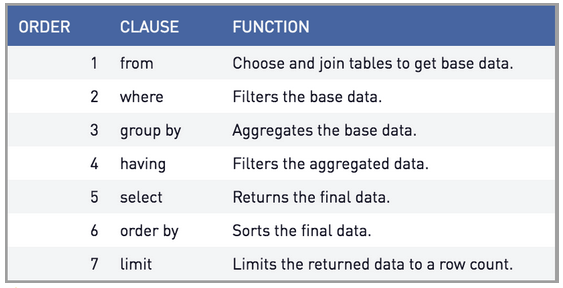

https://www.sisense.com/blog/sql-query-order-of-operations/

### Usefull Functions

#### MAX()

- Returns the item with the maximum value in the selected field

```sql
SELECT
  first_name,
  last_name,
  MAX(height) AS height
FROM patients;
```

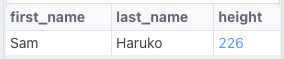

#### DISTINCT ()

- Returns all the unique values found in a field

```sql
SELECT DISTINCT(city) AS unique_cities
FROM patients
WHERE province_id = 'NS';
``` 
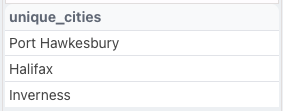

#### CASE

- Basically like an if statement

```sql
SELECT OrderID, Quantity,
CASE
    WHEN Quantity > 30 THEN 'The quantity is greater than 30'
    WHEN Quantity = 30 THEN 'The quantity is 30'
    ELSE 'The quantity is under 30'
END AS QuantityText
FROM OrderDetails; 
```

You can see another example of this in the 'Grouping' section of the SQL Basics above.

#### UNION

This combines the data from two different tables that don't have a common fielt to join on. 

For example, the below would combine the data from a table with patients and doctors names (from SQL exercise):

```sql
SELECT 
    first_name,
    last_name,
    'Patient' AS role
FROM patients
UNION ALL
SELECT
    first_name,
    last_name,
    'Doctor' AS role
FROM doctors;
```

#### POWER()

Math function to get an exponential expression;

10^2 would be:

```sql
POWER(10,2)
```

#### CAST()

If you want to change the data type of an item you would use this. 

Convert integer to float:

```sql
CAST(6 AS float)
```

Convert a value to a varchar datatype:

```sql
CAST(25.65 AS varchar)
```

Convert a value to a datetime datatype:

```sql
CAST('2017-08-25' AS datetime)
```

#### ISNULL()

```sql
SELECT ISNULL(full_name, 'Name Missing') -- Returns the full_name, or "Name Missing" if NULL
```

#### SUM()

Useful ways to implement sum functions

```sql
SELECT 
  SUM(gender = 'M') AS male_count, 
  SUM(gender = 'F') AS female_count
FROM patients
```

```sql
SELECT 
  SUM(CASE WHEN gender = 'M' THEN 1 END) AS male_count,
  SUM(CASE WHEN gender = 'F' THEN 1 END) AS female_count 
from patients;
```

### WHERE Filter Options

#### =, >, <, <=, >=, <> (Not Equal To)

```sql
WHERE age = 5
```

```sql
WHERE name = 'Fred'
```

```sql
WHERE name <> 'Sam'
```

#### BETWEEN (NOT BETWEEN)

Note that the values specified in the BETWEEN statement are inclusive. 

```sql
WHERE age BETWEEN 4 AND 24
```

```sql
WHERE cost NOT BETWEEN 30 AND 60
```

```sql
WHERE name BETWEEN 'Alex' AND 'Sam'
```

```sql
WHERE OrderDate BETWEEN #07/01/1996# AND #07/31/1996#
```

```sql
WHERE OrderDate BETWEEN '1996-07-01' AND '1996-07-31'
```

#### LIKE

The LIKE operator is used in a WHERE clause to search for a specified pattern in a column.

There are two wildcards often used in conjunction with the LIKE operator:

- The percent sign (%) represents zero, one, or multiple characters
- The underscore sign (_) represents one, single character
- You can also include a space ( ) to identify starting or ending of words

Here are some examples showing different LIKE operators with '%' and '_' wildcards:

```sql
WHERE CustomerName LIKE 'a%'    -- Finds any values that starts with "a"

WHERE CustomerName LIKE '%a'    -- Finds any values that ends with "a"

WHERE CustomerName LIKE '%or%'  -- Finds any values that have "or" in any position

WHERE CustomerName LIKE '_r%'   -- Finds any values that have "r" in the second position

WHERE CustomerName LIKE 'a__%'  -- Finds any values that starts with "a" and are at least 3 characters in length

WHERE ContactName LIKE 'a%o'    -- Finds any values that starts with "a" and ends with "o"
```

Wildcard Characters in SQL Server
https://www.w3schools.com/sql/sql_wildcards.asp
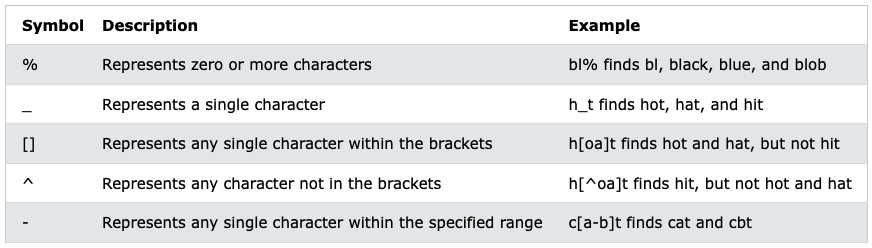

#### IN

The IN operator allows you to specify multiple values in a WHERE clause.

The IN operator is a shorthand for multiple OR conditions.

You can also pull the list from another subquery.

```sql

WHERE Country IN ('Germany', 'France', 'UK')

WHERE Country NOT IN ('Germany', 'France', 'UK')

WHERE Country IN (SELECT Country FROM Suppliers)
```

#### IS

Note that NULL needs to be filtered using the IS statements

```sql
WHERE allergies IS NULL
```

```sql
WHERE allergies IS NOT NULL
```

```sql
WHERE name IS 'Sam'
```

#### HAVING Filter Options

The HAVING statement is extremely versatile. 

It is able to filter for selected fields, **as well as others not included**. 

The query below will keep only the most recent admission for each of the patient_ids

```sql
SELECT *
FROM admissions
GROUP BY patient_id
HAVING
  admission_date = MAX(admission_date)
```

The query below will keep only province_ids for those with total height above 7000

```sql
SELECT
  province_id,
  SUM(height) AS sum_height
FROM patients
GROUP BY province_id
HAVING sum_height >= 7000
```

### SQL Injection

When submitting the registration form, the server executes something like this:

```sql
INSERT INTO Students (last_name, first_name)
VALUES('{last_name}', '{first_name}')
```

With the input Robert'); DROP TABLE Students; --, the SQL query executed is:

```sql
INSERT INTO students (last_name, first_name)
VALUES('Smith', 'Robert'); DROP TABLE Students; --');
```

**which will delete the Students table from the database!!!**

ℹ️ This exploit does not work on SQLite if you use execute() but does if you use executescript() (cf Documentation)

https://docs.python.org/3.7/library/sqlite3.html#sqlite3.Cursor.execute

#### Exploit example

Let's create an exploitable_db.sqlite with the following code:

In [ ]:
import sqlite3

conn = sqlite3.connect('data/exploitable_db.sqlite')
c = conn.cursor()

c.execute("""
CREATE TABLE users(
    id         INTEGER      PRIMARY KEY AUTOINCREMENT,
    username   VARCHAR(100) UNIQUE,
    password   VARCHAR(100)
)
""")

USERS = [
    ('john', 'passw0rd'),
    ('paul', 'supers3cret')
]

for user in USERS:
    c.execute("INSERT INTO users (username, password) VALUES (?, ?)", user)
    conn.commit()

conn.close()

You can use the code below to check it out from terminal

```cli
sqlite3 data/exploitable_db.sqlite
```

```sql
.headers on
.mode column
SELECT * FROM users;
.quit
```

In [26]:
import sqlite3
conn = sqlite3.connect('data/exploitable_db.sqlite')
c = conn.cursor()

def connect(username, password):
    query = f"""
        SELECT *
        FROM users
        WHERE users.username = '{username}'
        AND users.password = '{password}'
    """
    c.execute(query)
    user = c.fetchone()
    if user is None:
        return "Unauthorized"
    else:
        return "Authorized"

print(connect("john", "wrong_password"))
print(connect("john", "passw0rd"))

Unauthorized
Authorized


**EXPLOIT**

In [ ]:
print(connect("john", "'OR 1=1 --"))  # 😱

#### Use parameter substitution ✅

In [ ]:
import sqlite3

conn = sqlite3.connect('data/exploitable_db.sqlite')
c = conn.cursor()

def connect_safe(username, password):
    query = """
        SELECT *
        FROM users
        WHERE users.username = ?
        AND users.password = ?
    """
    c.execute(query, (username, password))
    user = c.fetchone()
    if user is None:
        return "Unauthorized"
    else:
        return "Authorized"

In [ ]:
print(connect_safe("john", "wrong_password"))
print(connect_safe("john", "passw0rd"))

In [ ]:
print(connect_safe("john", "'OR 1=1 --"))

### CRUD

    - Create
    - Update
    - Delete

In [ ]:
# Create/reset database to edit

import sqlite3

conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Check if the food table already exists

query = """
        SELECT name 
        FROM sqlite_master
        WHERE type='table';
    """

c.execute(query)
tables = c.fetchall()

if tables == []:
    
    print('Creating New Table')
    
    c.execute("""
    CREATE TABLE food(
        id         INTEGER      PRIMARY KEY AUTOINCREMENT,
        food_name  VARCHAR(100) UNIQUE,
        food_type  VARCHAR(100),
        healthy    VARCHAR(100), 
        desc       VARCHAR(100)
    )
    """)

    FOODS = [
        ('cheddar', 'dairy  ', 'kind_of', 'can vary in sharpness of taste'),
        ('Carrots', '  vegetable', 'yes', 'orange vegetable, tastes sweet'),
        ('steak', 'mean', 'kind_of', 'savory taste, normally beef')
    ]

    for food in FOODS:
        c.execute("INSERT INTO food (food_name, food_type, healthy, desc) VALUES (?, ?, ?, ?)", food)
        conn.commit()

    conn.close()

elif 'food' in tables[0]:
    
    print('CRUD database already exists with food table\n')
    
    query = '''
        SELECT *
        FROM food
    '''

    c.execute(query)
    rows = c.fetchall()

    print(f'Current Table')
    print(rows)
    
else: 
    print('We Have A Problem...')


In [ ]:
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')
rows

#### CREATE

```sql
INSERT INTO table (column1, column2, ...)
VALUES(value1, value2 , ...)
```

Insert a new row (a tuple of values) into a given table:

In [ ]:
# Connect to database
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Create new food items

query = '''
    INSERT INTO food (food_name, food_type, healthy, desc)
    VALUES ('chocolate_cake', 'desert', 'no', 'sweet chocolatey goodness')
'''

c.execute(query)

#Check the updated table

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

#### UPDATE

Update a row (or rows) in table:

```sql
UPDATE table
SET column_1 = new_value_1,
    column_2 = new_value_2
WHERE
    search_condition
```

example:

```sql
UPDATE Country
SET
    name = 'République Française'
WHERE
    id = 4769

```


In [ ]:
# Connect to database
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Correct the error in the steak item

query = '''
    UPDATE food
    SET
        food_type = 'meat', 
        healthy = 'no'
    WHERE 
        food_name = 'steak'
'''

c.execute(query)

# Commit the changed table to the database
conn.commit()

#Check the updated table

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

#### DELETE

Deleting a row (or rows) from table:

```sql
DELETE FROM table
WHERE search_condition
```

Example:

```sql
DELETE FROM Country
WHERE id = 4769
```

In [ ]:
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

#Keep only the healthy food

query = '''
    DELETE FROM food
    WHERE healthy != 'yes'
'''

c.execute(query)

#Check the updated table

query = '''
    SELECT *
    FROM food
'''

c.execute(query)
rows = c.fetchall()

print(f'Rows Returned: {len(rows)}')

rows

### Cleaning Data

#### String Functions
https://www.sqlitetutorial.net/sqlite-string-functions/

https://www.geeksforgeeks.org/sql-string-functions/

https://www.sqlite.org/lang_corefunc.html

##### **INSTR** 

- Find a substring in a string and returns an integer indicating the position of the first occurrence of the substring. 
- Returns 0 if it doesn't contain it.

```sql
SELECT INSTR('SQLite String Functions','Functions') Position;
```
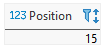

##### **LENGTH**

- Return the number of characters in a string or the number of bytes in a BLOB.

```sql
SELECT 
    LENGTH('SQLite')
```
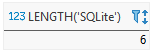

##### **LOWER**

- Return a copy of a string with all of the characters converted to lowercase.

```sql
SELECT
    LOWER('String Functions')
```
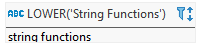

##### **UPPER**

- Return a copy of a string with all of the characters converted to uppercase.

```sql
SELECT
    UPPER('String Functions')
```
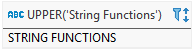

##### **LTRIM**

- Return a copy of a string that has specified characters removed from the beginning of a string.

```sql
SELECT 
   LTRIM(' SQLite '),
   LENGTH(' SQLite ') LengthBefore,
   LENGTH(LTRIM(' SQLite ')) LengthAfter
```
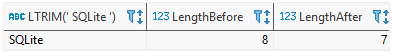

##### **RTRIM**

- Return a copy of a string that has specified characters removed from the end of a string.

```sql
SELECT
   RTRIM(' SQLite '),
   LENGTH(' SQLite ') LengthBefore,
   LENGTH(RTRIM(' SQLite ')) LengthAfter
```
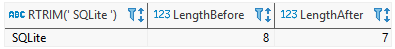

##### **TRIM**

- Return a copy of a string that has specified characters removed from the beginning and the end of a string.

```sql
SELECT 
    TRIM(' SQLite ')
```
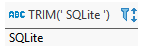

##### **REPLACE**

- Return a copy of a string with each instance of a substring replaced by another substring.

```sql
SELECT 
    REPLACE('These are string functions', 'These', 'Those')
```
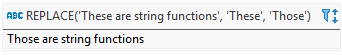

##### **SUBSTR**

- Extract and returns a substring with a predefined length starting at a specified position in a source string

```sql
SELECT 
    SUBSTR('SQLite String Functions', 1, 6)
```
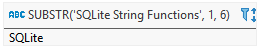

##### **CONCAT or ||**

- Concatenate two strings into a single string.

```sql
SELECT 'Concatenation ' || 'Operator'
```
or
```sql
SELECT CONCAT('Concatenation ','Operator')
```

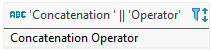

In [ ]:
conn = sqlite3.connect('data/CRUD_db.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        UPPER(food.food_name),
        TRIM(food.food_type),
        food.healthy,
        food.desc,
        SUBSTR(food.desc, 2, 8),
        REPLACE(food.desc, 'orange', 'green'),
        INSTR(food.desc, 'taste'),
        TRIM(food.food_name || food.food_type)
    FROM food
'''

c.execute(query)
rows = c.fetchall()

for row in rows:
    print(row)

### SQL Joins

Real power of SQL comes from working with data from multiple tables

#### Inner Joins

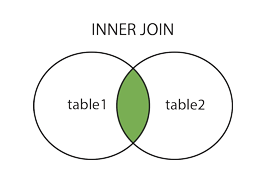

```sql
SELECT *
FROM League
JOIN Country ON Country.id = League.country_id
```

In [ ]:
import sqlite3

conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

query = '''
    SELECT *
    FROM League
    JOIN Country ON Country.id = League.country_id
'''

c.execute(query)
rows = c.fetchall()
rows

#### Left Join

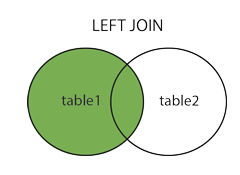

Even if some leagues have a country_id set to NULL, empty or pointing to an inexistent record (foreign key not properly set), this query will keep all the rows from the League table.

```sql
SELECT *
FROM League
LEFT JOIN Country ON Country.id = League.country_id
```

💡You can use the COALESCE function to replace NULL values with a default value:

```sql
SELECT 
    League.id,
    League.name,
    COALESCE(Country.name, 'Unknown') AS country_name
FROM League
LEFT JOIN Country ON Country.id = league.country_id
```

In [ ]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

query = '''
    SELECT *
    FROM League
    LEFT JOIN Country ON Country.id = League.country_id
'''

c.execute(query)
rows = c.fetchall()
rows

In [ ]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        League.id,
        League.name,
        COALESCE(Country.name, 'Unknown') AS country_name
    FROM League
    LEFT JOIN Country ON Country.id = league.country_id
'''

c.execute(query)
rows = c.fetchall()
rows

#### Right Join

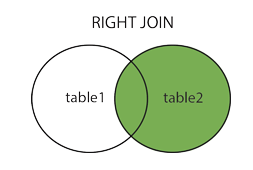



😢 Not supported in SQLite.

But: RIGHT JOIN is rarely used because you can achieve the results by simply switching the two joined table names in a LEFT JOIN.

#### Full Outer Join



😢 Not supported in SQLite.

Example: [Project & Members](http://www.sqlservertutorial.net/sql-server-basics/sql-server-full-outer-join/)

#### Self Join

Let this table employees:

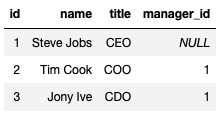


```sql
SELECT
    employees.id,
    employees.name,
    employees.title,
    managers.name AS manager
FROM employees
LEFT JOIN employees AS managers ON managers.id = employees.manager_id
```


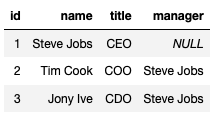

### Window Functions (LeWagon)



A window function performs a calculation across a set of table rows that are somehow related to the current row. This is comparable to the type of calculation that can be done with an aggregate function.

But unlike regular aggregate functions, use of a window function **does not cause rows to become grouped into a single output row** — the rows retain their separate identities.

Behind the scenes, the window function is able to access more than just the current row of the query result.


#### Ecommerce example

Let's create an ecommerce database

In [ ]:
# Creating and Seeding ecommerce DB

import sqlite3

conn = sqlite3.connect('data/ecommerce.sqlite')
c = conn.cursor()

# Create customers table
c.execute("""
    CREATE TABLE customers(
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name VARCHAR(20),
        last_name VARCHAR(20)
    )
""")
conn.commit()

# Create orders table
c.execute("""
    CREATE TABLE orders(
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        ordered_at TEXT,
        customer_id INTEGER,
        amount NUMERIC,
        FOREIGN KEY(customer_id) REFERENCES customers(id)
    )
""")
conn.commit()

# Seed
CUSTOMERS = [
    ('John', 'Doe'),
    ('Eric', 'Camron'),
    ('Emma', 'Dunstan'),
    ('Tobin', 'Holis'),
    ('Nyla', 'Carlin')
]
for customer in CUSTOMERS:
    c.execute("INSERT INTO customers (first_name, last_name) VALUES(?, ?)", customer)
    conn.commit()

ORDERS = [
    ('2019-01-01', 42.01, 1),
    ('2019-01-01', 12.14, 2),
    ('2019-01-02', 15.08, 1),
    ('2019-01-03', 123, 1),
    ('2019-01-04', 25.67, 3),
    ('2019-01-05', 76.12, 3),
    ('2019-01-09', 12.98, 1)
]
for order in ORDERS:
    c.execute("INSERT INTO orders (ordered_at, amount, customer_id) VALUES(?, ?, ?)", order)
    conn.commit()

conn.close()

##### **Rank**

🤔 For each order, what's its rank based on the customer who ordered? (Could be a useful feature for a Machine Learning model)

(i.e. For each order, we want to answer the question: Was it the customer's first order? second one? etc.)

In [ ]:
conn = sqlite3.connect('data/ecommerce.sqlite')
c = conn.cursor()

query = '''
    SELECT
        orders.id,
        orders.ordered_at,
        orders.customer_id,
        RANK() 
            OVER (
            PARTITION BY orders.customer_id
            ORDER BY orders.ordered_at
        ) AS order_rank
    FROM orders
'''

c.execute(query)
rows = c.fetchall()
rows

##### **Sum**

🤔 For each customer, what's the cumulative amount of orders in time?



Step1: Calculate the cumulative amount of orders in time

In [ ]:
conn = sqlite3.connect('data/ecommerce.sqlite')
c = conn.cursor()

query = '''
    SELECT
        orders.id,
        orders.ordered_at,
        orders.amount,
        orders.customer_id,
        SUM(orders.amount) OVER (
            PARTITION BY orders.customer_id 
            ORDER BY orders.ordered_at
        ) AS cumulative_amount
    FROM orders
'''

c.execute(query)
rows = c.fetchall()
rows

Step 2: Add the customer info

In [32]:
conn = sqlite3.connect('data/ecommerce.sqlite')
c = conn.cursor()

query = '''
    SELECT
        orders.id,
        customers.first_name,
        customers.last_name,
        orders.ordered_at,
        orders.amount,
        SUM(orders.amount) OVER (
            PARTITION BY orders.customer_id 
            ORDER BY orders.ordered_at
        ) AS cumulative_amount
    FROM customers
    LEFT JOIN orders ON orders.customer_id = customers.id
'''

c.execute(query)
rows = c.fetchall()
rows

[(None, 'Tobin', 'Holis', None, None, None),
 (None, 'Nyla', 'Carlin', None, None, None),
 (1, 'John', 'Doe', '2019-01-01', 42.01, 42.01),
 (3, 'John', 'Doe', '2019-01-02', 15.08, 57.089999999999996),
 (4, 'John', 'Doe', '2019-01-03', 123, 180.09),
 (7, 'John', 'Doe', '2019-01-09', 12.98, 193.07),
 (2, 'Eric', 'Camron', '2019-01-01', 12.14, 12.14),
 (5, 'Emma', 'Dunstan', '2019-01-04', 25.67, 25.67),
 (6, 'Emma', 'Dunstan', '2019-01-05', 76.12, 101.79)]

##### **WITH Clause**

👉 [Documentation](https://www.sqlite.org/draft/lang_with.html)

🤔 In the Soccer database, what's the cumulative number of matches played every month in order to plot it (with a line chart for instance)

We can start with:

In [ ]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

query = '''
    SELECT
      STRFTIME('%Y-%m', DATE(matches.date)) AS period,
      COUNT(*) AS cnt
    FROM "Match" AS matches
    GROUP BY period
    ORDER BY period
'''

c.execute(query)
rows = c.fetchall()
print(f'Rows Returned: {len(rows)}')
rows[0:10]

In [ ]:
conn = sqlite3.connect('data/soccer.sqlite')
c = conn.cursor()

query = '''
    WITH matches_per_month AS (
        SELECT
            STRFTIME('%Y-%m', DATE(matches.date)) AS period,
            COUNT(*) AS cnt
        FROM "Match" AS matches
        GROUP BY period
        ORDER BY period
    )
    SELECT 
        matches_per_month.period,
        SUM(matches_per_month.cnt) OVER (
            ORDER BY matches_per_month.period
        ) AS cumulative_count
    FROM matches_per_month
'''

c.execute(query)
rows = c.fetchall()
print(f'Rows Returned: {len(rows)}')
rows[0:10]

### Window Functions (sqlite.org)

https://www.sqlite.org/windowfunctions.html

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    CREATE TABLE t1(a INTEGER PRIMARY KEY, b, c)
'''
c.execute(query)
conn.commit()

print('Created Table t1')

query = '''
    INSERT INTO t1 
    VALUES   
        (1, 'A', 'one'  ),
        (2, 'B', 'two'  ),
        (3, 'C', 'three'),
        (4, 'D', 'one'  ),
        (5, 'E', 'two'  ),
        (6, 'F', 'three'),
        (7, 'G', 'one'  )
'''
c.execute(query)
conn.commit()

print('Entered Data Into Table t1')

query = '''
    CREATE TABLE t2(a, b)
'''
c.execute(query)
conn.commit()

print('Created Table t2')

query = '''
    INSERT INTO t2 
    VALUES
        ('a', 'one'),
        ('a', 'two'), 
        ('a', 'three'), 
        ('b', 'four'), 
        ('c', 'five'), 
        ('c', 'six');
'''
c.execute(query)
conn.commit()

print('Entered Data Into Table t2')

A window function is an SQL function where the input values are taken from a "window" of one or more rows in the results set of a SELECT statement.

Window functions are distinguished from other SQL functions by the presence of an OVER clause. If a function has an OVER clause, then it is a window function. If it lacks an OVER clause, then it is an ordinary aggregate or scalar function. Window functions might also have a FILTER clause in between the function and the OVER clause. 

Unlike ordinary functions, window functions cannot use the DISTINCT keyword. Also, Window functions may only appear in the result set and in the ORDER BY clause of a SELECT statement.

Window functions come in two varieties: **aggregate window functions** and **built-in window functions**. Every aggregate window function can also work as a ordinary aggregate function, simply by omitting the OVER and FILTER clauses. Furthermore, all of the built-in aggregate functions of SQLite can be used as an aggregate window function by adding an appropriate OVER clause. Applications can register new aggregate window functions using the sqlite3_create_window_function() interface. The built-in window functions, however, require special-case handling in the query planner and hence new window functions that exhibit the exceptional properties found in the built-in window functions cannot be added by the application.

Here is an example using the built-in row_number() window function: 

#### **Aggregate Window Functions**

An aggregate window function is similar to an ordinary aggregate function, except adding it to a query does not change the number of rows returned. Instead, for each row the result of the aggregate window function is as if the corresponding aggregate were run over all rows in the "window frame" specified by the OVER clause.

In the example **below**, the window frame consists of all rows between the previous row ("1 PRECEDING") and the following row ("1 FOLLOWING"), inclusive, where rows are sorted according to the ORDER BY clause in the window-defn (in this case "ORDER BY a"). For example, the frame for the row with (a=3) consists of rows (2, 'B', 'two'), (3, 'C', 'three') and (4, 'D', 'one'). The result of group_concat(b, '.') for that row is therefore 'B.C.D'. 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        a, 
        b, 
        GROUP_CONCAT(b, '.') OVER (
            ORDER BY a ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING
        ) AS group_concat 
    FROM t1
'''
c.execute(query)

rows = c.fetchall()
rows

##### **The PARTITION BY Clause**

For the purpose of computing window functions, the result set of a query is divided into one or more "partitions". A partition consists of all rows that have the same value for all terms of the PARTITION BY clause in the window-defn. If there is no PARTITION BY clause, then the entire result set of the query is a single partition. Window-function processing is performed separately for each partition. 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        c, 
        a, 
        b, 
        GROUP_CONCAT(b, '.') OVER (
            PARTITION BY c 
            ORDER BY a 
            RANGE BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING
        ) AS group_concat
    FROM t1 
    ORDER BY 
        c, 
        a
'''
c.execute(query)

rows = c.fetchall()
rows

---
In the query above, the "PARTITION BY c" clause breaks the result set up into three partitions. The first partition has three rows with c=='one'. The second partition has two rows with c=='three' and the third partition has two rows with c=='two'.

In the example above, all the rows for each partition are grouped together in the final output. This is because the PARTITION BY clause is a prefix of the ORDER BY clause on the overall query. But that does not have to be the case. A partition can be composed of rows scattered about haphazardly within the result set. For example: 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        c, 
        a, 
        b, 
        GROUP_CONCAT(b, '.') OVER (
            PARTITION BY c 
            ORDER BY a 
            RANGE BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING
        ) AS group_concat
    FROM t1 
    ORDER BY 
        a
'''
c.execute(query)

rows = c.fetchall()
rows

##### **Frame Specifications**

 The frame-spec determines which output rows are read by an aggregate window function. The frame-spec consists of four parts:

    A frame type - either ROWS, RANGE or GROUPS,
    A starting frame boundary,
    An ending frame boundary,
    An EXCLUDE clause. 
    
The ending frame boundary can be omitted (if the BETWEEN and AND keywords that surround the starting frame boundary are also omitted), in which case the ending frame boundary defaults to CURRENT ROW.

If the frame type is RANGE or GROUPS, then rows with the same values for all ORDER BY expressions are considered "peers". Or, if there are no ORDER BY terms, all rows are peers. Peers are always within the same frame.

The default frame-spec is:

```sql
RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW EXCLUDE NO OTHERS
```

The default means that aggregate window functions read all rows from the beginning of the partition up to and including the current row and its peers. This implies that rows that have the same values for all ORDER BY expressions will also have the same value for the result of the window function (as the window frame is the same). For example: 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        a, 
        b, 
        c, 
        group_concat(b, '.') OVER (
            ORDER BY c
        ) AS group_concat 
    FROM t1 
    ORDER BY a
'''
c.execute(query)

rows = c.fetchall()
rows

##### **Frame Type**

 There are three frame types: ROWS, GROUPS, and RANGE. The frame type determines how the starting and ending boundaries of the frame are measured.

    ROWS: The ROWS frame type means that the starting and ending boundaries for the frame are determined by counting individual rows relative to the current row.

    GROUPS: The GROUPS frame type means that the starting and ending boundaries are determine by counting "groups" relative to the current group. A "group" is a set of rows that all have equivalent values for all all terms of the window ORDER BY clause. ("Equivalent" means that the IS operator is true when comparing the two values.) In other words, a group consists of all peers of a row.

    RANGE: The RANGE frame type requires that the ORDER BY clause of the window have exactly one term. Call that term "X". With the RANGE frame type, the elements of the frame are determined by computing the value of expression X for all rows in the partition and framing those rows for which the value of X is within a certain range of the value of X for the current row. See the description in the "<expr> PRECEDING" boundary specification below for details. 

The ROWS and GROUPS frame types are similar in that they both determine the extent of a frame by counting relative to the current row. The difference is that ROWS counts individual rows and GROUPS counts peer groups. The RANGE frame type is different. The RANGE frame type determines the extent of a frame by looking for expression values that are within some band of values relative to the current row. 

##### Frame Boundaries

There are five ways to describe starting and ending frame boundaries:

1) **UNBOUNDED PRECEDING**
    
The frame boundary is the first row in the partition.

2) **\<expr> PRECEDING**
    
\<expr> must be a non-negative constant numeric expression. The boundary is a row that is <expr> "units" prior to the current row. The meaning of "units" here depends on the frame type:

    ROWS → The frame boundary is the row that is <expr> rows before the current row, or the first row of the partition if there are fewer than <expr> rows before the current row. <expr> must be an integer.

    GROUPS → A "group" is a set of peer rows - rows that all have the same values for every term in the ORDER BY clause. The frame boundary is the group that is <expr> groups before the group containing the current row, or the first group of the partition if there are fewer than <expr> groups before the current row. For the starting boundary of a frame, the first row of the group is used and for the ending boundary of a frame, the last row of the group is used. <expr> must be an integer.

    RANGE → For this form, the ORDER BY clause of the window-defn must have a single term. Call that ORDER BY term "X". Let Xi be the value of the X expression for the i-th row in the partition and let Xc be the value of X for the current row. Informally, a RANGE bound is the first row for which Xi is within the <expr> of Xc. More precisely:
    
        If either Xi or Xc are non-numeric, then the boundary is the first row for which the expression "Xi IS Xc" is true.
        Else if the ORDER BY is ASC then the boundary is the first row for which Xi>=Xc-<expr>.
        Else if the ORDER BY is DESC then the boundary is the first row for which Xi<=Xc+<expr>. 
        
        For this form, the <expr> does not have to be an integer. It can evaluate to a real number as long as it is constant and non-negative. 
    
The boundary description "0 PRECEDING" always means the same thing as "CURRENT ROW".

3) **CURRENT ROW**

The current row. For RANGE and GROUPS frame types, peers of the current row are also included in the frame, unless specifically excluded by the EXCLUDE clause. This is true regardless of whether CURRENT ROW is used as the starting or ending frame boundary.

4) **\<expr> FOLLOWING**
    This is the same as "<expr> PRECEDING" except that the boundary is <expr> units after the current rather than before the current row.

5) **UNBOUNDED FOLLOWING**

The frame boundary is the last row in the partition. 

The ending frame boundary may not take a form that appears higher in the above list than the starting frame boundary.

In the following example, the window frame for each row consists of all rows from the current row to the end of the set, where rows are sorted according to "ORDER BY a". 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        c, 
        a, 
        b, 
        group_concat(b, '.') OVER (
            ORDER BY 
                c, 
                a 
            ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING
        ) AS group_concat
    FROM t1 ORDER BY c, a;

'''
c.execute(query)

rows = c.fetchall()
rows

##### **The EXCLUDE Clause**

 The optional EXCLUDE clause may take any of the following four forms:

    EXCLUDE NO OTHERS: This is the default. In this case no rows are excluded from the window frame as defined by its starting and ending frame boundaries.

    EXCLUDE CURRENT ROW: In this case the current row is excluded from the window frame. Peers of the current row remain in the frame for the GROUPS and RANGE frame types.

    EXCLUDE GROUP: In this case the current row and all other rows that are peers of the current row are excluded from the frame. When processing an EXCLUDE clause, all rows with the same ORDER BY values, or all rows in the partition if there is no ORDER BY clause, are considered peers, even if the frame type is ROWS.

    EXCLUDE TIES: In this case the current row is part of the frame, but peers of the current row are excluded. 

The following example demonstrates the effect of the various forms of the EXCLUDE clause: 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        c, a, b,
        group_concat(b, '.') OVER (
            ORDER BY c 
            GROUPS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW 
            EXCLUDE NO OTHERS
            ) AS no_others,
        group_concat(b, '.') OVER (
            ORDER BY 
                c 
            GROUPS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW 
            EXCLUDE CURRENT ROW
            ) AS current_row,
        group_concat(b, '.') OVER (
            ORDER BY 
                c 
            GROUPS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW 
            EXCLUDE GROUP
            ) AS grp,
        group_concat(b, '.') OVER (
            ORDER BY 
                c 
            GROUPS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW 
            EXCLUDE TIES
            ) AS ties
    FROM t1 
    ORDER BY 
        c, 
        a
'''
c.execute(query)

rows = c.fetchall()
rows

##### The FILTER Clause

If a FILTER clause is provided, then only rows for which the expr is true are included in the window frame. The aggregate window still returns a value for every row, but those for which the FILTER expression evaluates to other than true are not included in the window frame for any row. For example: 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        a, 
        c, 
        b, 
        group_concat(b, '.') FILTER (WHERE c!='two') OVER (
            ORDER BY a
        ) AS group_concat
    FROM t1 
    ORDER BY a
'''
c.execute(query)

rows = c.fetchall()
rows

#### Built-in Window Functions

##### **Functions**

As well as aggregate window functions, SQLite features a set of built-in window functions based on those supported by PostgreSQL.

Built-in window functions honor any PARTITION BY clause in the same way as aggregate window functions - each selected row is assigned to a partition and each partition is processed separately. The ways in which any ORDER BY clause affects each built-in window function is described below. Some of the window functions (rank(), dense_rank(), percent_rank() and ntile()) use the concept of "peer groups" (rows within the same partition that have the same values for all ORDER BY expressions). In these cases, it does not matter whether the frame-spec specifies ROWS, GROUPS, or RANGE. For the purposes of built-in window function processing, rows with the same values for all ORDER BY expressions are considered peers regardless of the frame type.

Most built-in window functions ignore the frame-spec, the exceptions being first_value(), last_value() and nth_value(). It is a syntax error to specify a FILTER clause as part of a built-in window function invocation.

SQLite supports the following 11 built-in window functions:

**row_number()**

    The number of the row within the current partition. Rows are numbered starting from 1 in the order defined by the ORDER BY clause in the window definition, or in arbitrary order otherwise. 

**rank()**

    The row_number() of the first peer in each group - the rank of the current row with gaps. If there is no ORDER BY clause, then all rows are considered peers and this function always returns 1. 

**dense_rank()**

    The number of the current row's peer group within its partition - the rank of the current row without gaps. Rows are numbered starting from 1 in the order defined by the ORDER BY clause in the window definition. If there is no ORDER BY clause, then all rows are considered peers and this function always returns 1. 

**percent_rank()**

    Despite the name, this function always returns a value between 0.0 and 1.0 equal to (rank - 1)/(partition-rows - 1), where rank is the value returned by built-in window function rank() and partition-rows is the total number of rows in the partition. If the partition contains only one row, this function returns 0.0. 

**cume_dist()**

    The cumulative distribution. Calculated as row-number/partition-rows, where row-number is the value returned by row_number() for the last peer in the group and partition-rows the number of rows in the partition. 

**ntile(N)**

    Argument N is handled as an integer. This function divides the partition into N groups as evenly as possible and assigns an integer between 1 and N to each group, in the order defined by the ORDER BY clause, or in arbitrary order otherwise. If necessary, larger groups occur first. This function returns the integer value assigned to the group that the current row is a part of. 

**lag(expr)
lag(expr, offset)
lag(expr, offset, default)**

    The first form of the lag() function returns the result of evaluating expression expr against the previous row in the partition. Or, if there is no previous row (because the current row is the first), NULL.

    If the offset argument is provided, then it must be a non-negative integer. In this case the value returned is the result of evaluating expr against the row offset rows before the current row within the partition. If offset is 0, then expr is evaluated against the current row. If there is no row offset rows before the current row, NULL is returned.

    If default is also provided, then it is returned instead of NULL if the row identified by offset does not exist. 

**lead(expr)
lead(expr, offset)
lead(expr, offset, default)**

    The first form of the lead() function returns the result of evaluating expression expr against the next row in the partition. Or, if there is no next row (because the current row is the last), NULL.

    If the offset argument is provided, then it must be a non-negative integer. In this case the value returned is the result of evaluating expr against the row offset rows after the current row within the partition. If offset is 0, then expr is evaluated against the current row. If there is no row offset rows after the current row, NULL is returned.

    If default is also provided, then it is returned instead of NULL if the row identified by offset does not exist. 

**first_value(expr)**

    This built-in window function calculates the window frame for each row in the same way as an aggregate window function. It returns the value of expr evaluated against the first row in the window frame for each row. 

**last_value(expr)**

    This built-in window function calculates the window frame for each row in the same way as an aggregate window function. It returns the value of expr evaluated against the last row in the window frame for each row. 

**nth_value(expr, N)**

    This built-in window function calculates the window frame for each row in the same way as an aggregate window function. It returns the value of expr evaluated against the row N of the window frame. Rows are numbered within the window frame starting from 1 in the order defined by the ORDER BY clause if one is present, or in arbitrary order otherwise. If there is no Nth row in the partition, then NULL is returned. 

##### Examples

The following example illustrates the behaviour of the five ranking functions - row_number(), rank(), dense_rank(), percent_rank() and cume_dist().

In [27]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        a                        AS a,
        row_number() OVER win    AS row_number,
        rank() OVER win          AS rank,
        dense_rank() OVER win    AS dense_rank,
        percent_rank() OVER win  AS percent_rank,
        cume_dist() OVER win     AS cume_dist
    FROM t2
    WINDOW win AS (ORDER BY a)
'''
c.execute(query)

rows = c.fetchall()
rows

[('a', 1, 1, 1, 0.0, 0.5),
 ('a', 2, 1, 1, 0.0, 0.5),
 ('a', 3, 1, 1, 0.0, 0.5),
 ('b', 4, 4, 2, 0.6, 0.6666666666666666),
 ('c', 5, 5, 3, 0.8, 1.0),
 ('c', 6, 5, 3, 0.8, 1.0)]

---
The example below uses ntile() to divide the six rows into two groups (the ntile(2) call) and into four groups (the ntile(4) call). For ntile(2), there are three rows assigned to each group. For ntile(4), there are two groups of two and two groups of one. The larger groups of two appear first. 

In [ ]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        a                        AS a,
        b                        AS b,
        ntile(2) OVER win        AS ntile_2,
        ntile(4) OVER win        AS ntile_4
    FROM t2
    WINDOW win AS (ORDER BY a)
'''
c.execute(query)

rows = c.fetchall()
rows

---
The next example demonstrates lag(), lead(), first_value(), last_value() and nth_value(). The frame-spec is ignored by both lag() and lead(), but respected by first_value(), last_value() and nth_value(). 

In [31]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT 
        b                          AS b,
        lead(b, 2, 'n/a') OVER win AS lead,
        lag(b) OVER win            AS lag,
        first_value(b) OVER win    AS first_value,
        last_value(b) OVER win     AS last_value,
        nth_value(b, 3) OVER win   AS nth_value_3
    FROM t1
    WINDOW win AS (
        ORDER BY b 
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    )
'''
c.execute(query)

rows = c.fetchall()
rows

[('A', 'C', None, 'A', 'A', None),
 ('B', 'D', 'A', 'A', 'B', None),
 ('C', 'E', 'B', 'A', 'C', 'C'),
 ('D', 'F', 'C', 'A', 'D', 'C'),
 ('E', 'G', 'D', 'A', 'E', 'C'),
 ('F', 'n/a', 'E', 'A', 'F', 'C'),
 ('G', 'n/a', 'F', 'A', 'G', 'C')]

#### Window Chaining

Window chaining is a shorthand that allows one window to be defined in terms of another. Specifically, the shorthand allows the new window to implicitly copy the PARTITION BY and optionally ORDER BY clauses of the base window. For example, in the following: 

In [28]:
conn = sqlite3.connect('data/play.sqlite')
c = conn.cursor()

query = '''
    SELECT
        a,
        b,
        c,
        group_concat(b, '.') OVER (
            win 
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        )
    FROM t1
    WINDOW win AS (
        PARTITION BY c 
        ORDER BY a
    )
'''
c.execute(query)

rows = c.fetchall()
rows

[(1, 'A', 'one', 'A'),
 (4, 'D', 'one', 'A.D'),
 (7, 'G', 'one', 'A.D.G'),
 (3, 'C', 'three', 'C'),
 (6, 'F', 'three', 'C.F'),
 (2, 'B', 'two', 'B'),
 (5, 'E', 'two', 'B.E')]

 the window used by the group_concat() function is equivalent to "PARTITION BY a ORDER BY c ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW". In order to use window chaining, all of the following must be true:

    The new window definition must not include a PARTITION BY clause. The PARTITION BY clause, if there is one, must be supplied by the base window specification.

    If the base window has an ORDER BY clause, it is copied into the new window. In this case the new window must not specify an ORDER BY clause. If the base window has no ORDER BY clause, one may be specified as part of the new window definition.

    The base window may not specify a frame specification. The frame specification can only be given in the new window specification. 
    
The two fragments of SQL below are similar, but not entirely equivalent, as the latter will fail if the definition of window "win" contains a frame specification.

```sql
SELECT group_concat(b, '.') OVER win ...
SELECT group_concat(b, '.') OVER (win) ...
```

### Other Misc. Stuff

#### How to list tables using SQLite3 in Python

In [ ]:
# Importing Sqlite3 Module
import sqlite3
 
try:
    sqliteConnection = sqlite3.connect('data/soccer.sqlite')
     
    print("Connected to SQLite\n")
 
    # Getting all tables from sqlite_master
    
    sql_query = """
        SELECT name 
        FROM sqlite_master
        WHERE type='table';
    """
 
    # Creating cursor object using connection object
    
    cursor = sqliteConnection.cursor()
    cursor.execute(sql_query)
    
    print("List of tables\n")
    print(cursor.fetchall())

except sqlite3.Error as error:
    print("Failed to execute the above query", error)
     
finally:
   
    # Inside Finally Block, If connection is
    # open, we need to close it
    if sqliteConnection:
         
        sqliteConnection.close()
        print("\nthe sqlite connection is closed")

#### How to Show all Columns in a table

In [ ]:
conn = sqlite3.connect('data/soccer.sqlite')

c = conn.cursor()

query = '''
    SELECT *
    FROM Player
'''

# Display columns
print('\nColumns in EMPLOYEE table:\n')

data = c.execute(query)

for column in list(data.description)[0:10]:
    print(column[0])

# rows = c.fetchall()

# Display data
print('\nData in EMPLOYEE table:\n')

for row in list(data)[0:10]:
    print(row)

#### Execute Script (instead of single query)

In [ ]:
# import sqlite3 module
import sqlite3
  
# create con object to connect 
# the database geeks_db.db
con = sqlite3.connect("data/geeks_db.db")
  
# create the cursor object
cur = con.cursor()
  
# execute the script by creating the 
# table named geeks_demo and insert the data
cur.executescript("""
    create table geeks_demo(
        geek_id,
        geek_name
    );
   insert into geeks_demo values ( '7058', 'sravan kumar' );
   insert into geeks_demo values ( '7059', 'Jyothika' );
   insert into geeks_demo values ( '7072', 'Harsha' );
   insert into geeks_demo values ( '7075', 'Deepika' );
      
    """)
  
# display the data in the table by 
# executing the cursor object
cur.execute("SELECT * from geeks_demo")
  
# fetch all the data
print(cur.fetchall())

#### Selecting NULL values

In [ ]:
# Create database with NULL values

# import sqlite3 module
import sqlite3
  
# create con object to connect 
# the database null_select.db
con = sqlite3.connect("data/null_select.db")
  
# create the cursor object
cur = con.cursor()
  
# execute the script by creating the 
# table named null_select and insert the data
cur.executescript("""
    create table null_select(
        worker_id,
        worker_name
    );
   insert into null_select values ( '7058', 'sravan kumar' );
   insert into null_select values ( '7059', 'Jyothika' );
   insert into null_select values ( '7072', 'Harsha' );
   insert into null_select values ( '7075', NULL );
      
    """)
  
# display the data in the table by 
# executing the cursor object
cur.execute("SELECT * from null_select")
  
# fetch all the data
print(cur.fetchall())

In [3]:
con = sqlite3.connect("data/null_select.db")
cur = con.cursor()

query = '''
    SELECT
        *
    FROM null_select
    WHERE worker_name IS NULL
'''
cur.execute(query)

rows = cur.fetchall()
rows

[('7075', None)]

#### Countif() For SQL

The Microsoft Excel function countif counts cells that satisfy a condition:

    Excel: =COUNTIF(<source>, <condition>)
    
The same behavior can be obtained in SQL by using a case expression inside the count function:

```sql
COUNT(CASE WHEN <condition> THEN 1 END)
```

Below are a few examples:

   1. Excel: =COUNTIF(Ax:Ay, 42)

```sql
COUNT(CASE WHEN A = 42 THEN 1 END)
```

   2. Excel: =COUNTIF(Ax:Ay, "Marvin*")
    
```sql
COUNT(CASE WHEN A LIKE 'Marvin%' THEN 1 END)
```

   3. Excel: =COUNTIFS(Ax:Ay, 42, Bx:By, 43)
   
```sql
COUNT(CASE WHEN A = 42 AND B = 43 THEN 1 END)
```

The following expression counts the rows that have neither the null value or the empty string.

```sql
COUNT(CASE WHEN A IS NOT NULL AND A != '' THEN 1 END)
```

Alternately, you can use the following solutions, which were from an SQL exercise where you needed to sum all the male and female patients:

```sql
SELECT 
  (SELECT count(*) FROM patients WHERE gender='M') AS male_count, 
  (SELECT count(*) FROM patients WHERE gender='F') AS female_count;
```

or

```sql
SELECT 
  SUM(Gender = 'M') as male_count, 
  SUM(Gender = 'F') AS female_count
FROM patients
```

or 

```sql
select 
  sum(case when gender = 'M' then 1 end) as male_count,
  sum(case when gender = 'F' then 1 end) as female_count 
from patients;
```

#### Remove NULL from query

Add this after the FROM:

```sql
WHERE column IS NOT null
```

#### How To Calculate A Percentage Of A Calculation

What a pain in the as...

1. Use CAST to get from int to float
2. Use ROUND to get to the desired number of decimal points
3. Multipy by 100 to get to percentages
4. Use CONCAT to append '%'

```sql
SELECT 
    CONCAT(
        ROUND(CAST(SUM(gender = 'M') AS float) / CAST(count(*) AS float),
              4)
           *100,
           '%')
FROM patients;
```

### Cool Examples

#### SELECT SUM CASE GROUPBY

You can SELECT the SUM of a CASE, which can then be used by a GROUP BY to bucket the sums.

```sql
SELECT 
    CASE 
        WHEN patient_id % 2 = 0 Then 'Yes'
        ELSE 'No' 
    END as has_insurance,
    SUM(
        CASE 
            WHEN patient_id % 2 = 0 Then 10
            ELSE 50 
        END) as cost_after_insurance
FROM admissions 
GROUP BY has_insurance;
```

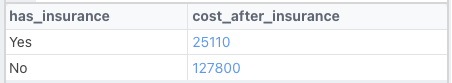

```sql
SELECT pr.province_name
FROM patients AS pa
  JOIN province_names AS pr ON pa.province_id = pr.province_id
GROUP BY pr.province_name
HAVING
  COUNT( CASE WHEN gender = 'M' THEN 1 END) > COUNT( CASE WHEN gender = 'F' THEN 1 END);
```